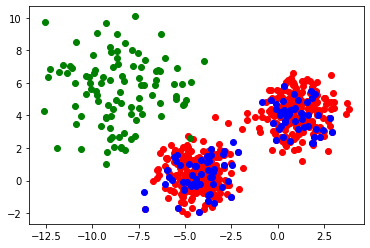

In [1]:
#データ生成
from sklearn import datasets
import matplotlib.pyplot as plt
X_train,_ = datasets.make_blobs(centers=2,random_state=3, cluster_std=1, n_samples=500)
X_inlier,_ = datasets.make_blobs(centers=2,random_state=3, cluster_std=1, n_samples=600)
X_inlier = X_inlier[500:600]
X_outlier,_= datasets.make_blobs(centers=1,random_state=7, cluster_std=2, n_samples=100)
#訓練データは赤
plt.scatter(X_train[:,0], X_train[:,1], c='red')
#inlierのテストデータは青
plt.scatter(X_inlier[:,0], X_inlier[:,1], c='blue')
#outlierのテストデータは緑
plt.scatter(X_outlier[:,0], X_outlier[:,1], c='green')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


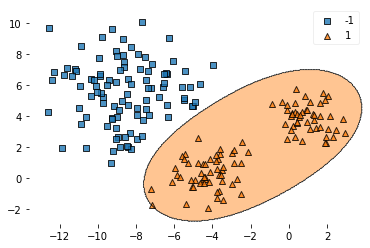

In [4]:
from sklearn import svm
import numpy as np
from mlxtend.plotting  import plot_decision_regions
clf = svm.OneClassSVM(nu=0.001, gamma=0.01, kernel="rbf")
clf.fit(X_train)

y_pred_inlier = clf.predict(X_inlier)
y_pred_outlier = clf.predict(X_outlier)
X = np.r_[X_inlier, X_outlier]
y = np.r_[y_pred_inlier, y_pred_outlier]
plot_decision_regions(X=X, y=y, clf=clf)
plt.show()